In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from math import sqrt, exp, pi, sinh
from tqdm import tqdm

### overdamped Langevin integrator

r(t+dt) = r(t) + F(r(t))/(m gamma) dt + sqrt(T/(m gamma)) Xi sqrt(dt)

In [182]:
# constants
Nsims = int(1e3)
x0 = 0
xini = 5
m = 1
T = 0.1
kb= 1
dt = 0.01
Tmax = 105
Nt= int(Tmax/dt)
k = 1
gamma=1
D=1
eps=1e-3
omega = D*k/(kb*T)

x = np.zeros(Nt)
x[0] = xini
rand = lambda: np.random.randn()
# F= -\nabla V; V = kx^/2
f = lambda x: -k*x
a = sqrt(2*kb*T/(m*gamma))
times = [i*dt for i in range(Nt)]
print(max(times))

def P(x,t):
    return (np.sqrt(omega*np.exp(omega*t)/(4*pi*D*np.sinh(omega*t)))
            *np.exp(-omega/(4*D)*(x*np.exp(omega*t/2)-x0*np.exp(-omega*t/2))**2/(sinh(omega*t))))
    
time_targets = np.array([.1, 1, 10, 100])

104.99000000000001


In [183]:
# sims loop
saved_x=[]
saved_P = np.zeros((len(time_targets), Nsims))
for sim in tqdm(range(Nsims)):
    x = np.zeros(Nt)
    x[0] = xini
    savedi=0
    for i in range(Nt-1):
        x[i+1] = x[i] + f(x[i])/(m*gamma) * dt + a * rand() *sqrt(dt)
        if any(abs(time_targets-(i+1)*dt)<=eps):
            try:
                saved_x.append(x[i+1])
                saved_P[savedi, sim] = P(saved_x[-1], (i+1)*dt)
                savedi +=1
            except OverflowError:
                continue

  0%|          | 0/1000 [00:00<?, ?it/s]/tmp/ipykernel_4433/3986414217.py:27: RuntimeWarning: overflow encountered in exp
  return (np.sqrt(omega*np.exp(omega*t)/(4*pi*D*np.sinh(omega*t)))
/tmp/ipykernel_4433/3986414217.py:27: RuntimeWarning: overflow encountered in sinh
  return (np.sqrt(omega*np.exp(omega*t)/(4*pi*D*np.sinh(omega*t)))
/tmp/ipykernel_4433/3986414217.py:27: RuntimeWarning: invalid value encountered in scalar divide
  return (np.sqrt(omega*np.exp(omega*t)/(4*pi*D*np.sinh(omega*t)))
/tmp/ipykernel_4433/3986414217.py:28: RuntimeWarning: overflow encountered in scalar power
  *np.exp(-omega/(4*D)*(x*np.exp(omega*t/2)-x0*np.exp(-omega*t/2))**2/(sinh(omega*t))))
100%|██████████| 1000/1000 [01:32<00:00, 10.82it/s]


In [184]:
np.shape(saved_P)

(4, 1000)

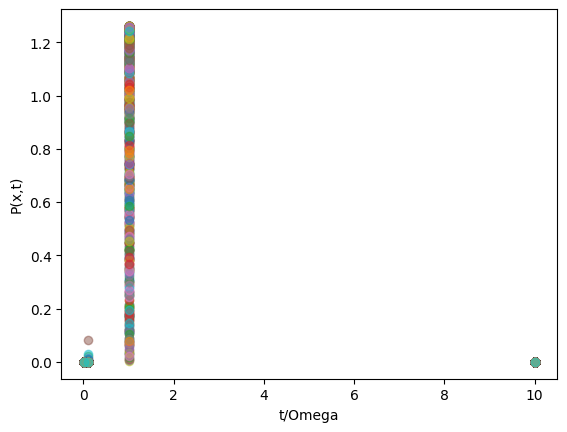

In [185]:
for sim in range(saved_P.shape[1]):
    plt.scatter(time_targets/10, saved_P[:, sim], alpha=0.5)
plt.xlabel("t/Omega");
plt.ylabel("P(x,t)");


In [4]:
N = 1000  
k = 1
gamma = 1
kBT = 1
x0 = 2.0 
t_over_Omega = [1e-2, 1e-1, 1, 10]
Omega = k / gamma

# Time step (small fraction of relaxation time)
dt = 0.01 / Omega
t_max = max(t_over_Omega) / Omega
n_steps = int(t_max / dt)

# Initialize positions
x = np.full(N, x0)

# Times to save distributions
save_indices = [int(t * Omega / dt) for t in t_over_Omega]
distributions = []

# Simulation loop
for n in range(n_steps):
    xi = np.random.normal(0, 1, size=N)  # noise
    x += -(k / gamma) * x * dt + np.sqrt(2 * kBT / gamma) * np.sqrt(dt) * xi

    if n in save_indices:
        distributions.append(x.copy())

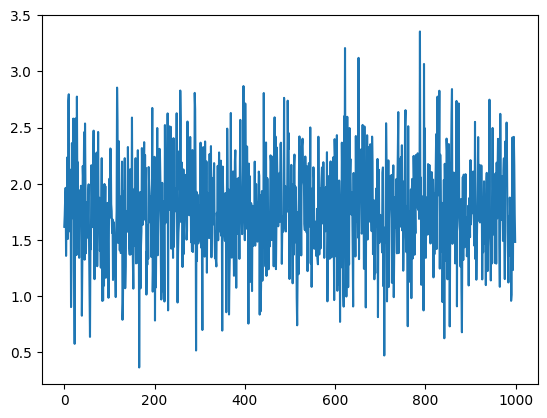

In [6]:
plt.plot(distributions[1]);

IndexError: list index out of range

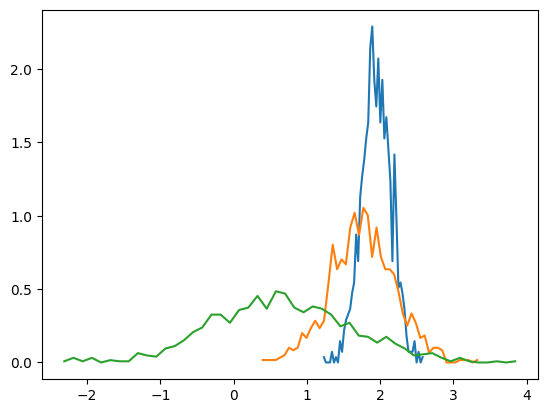

In [7]:
for i, t_val in enumerate(t_over_Omega):
    hist, bins = np.histogram(distributions[i], bins=50, density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    plt.plot(bin_centers, hist, label=f"t/Ω={t_val}")


# Optional: plot analytical solution
def P_analytical(x, x0, t, D, Omega):
    sh = np.sinh(Omega * t)
    prefac = (Omega * np.exp(Omega * t) / (4 * np.pi * D * sh)) ** 0.5
    exponent = (
        -Omega
        / (4 * D)
        * ((x * np.exp(Omega * t / 2) - x0 * np.exp(-Omega * t / 2)) ** 2)
        / sh
    )
    return prefac * np.exp(exponent)


x_vals = np.linspace(-3, 3, 200)
for t_val in t_over_Omega:
    plt.plot(x_vals, P_analytical(x_vals, x0, t_val / Omega, kBT / gamma, Omega), "k--")

plt.xlabel("x")
plt.ylabel("P(x,t)")
plt.legend()
plt.show()